Data Description:
    
The data is related with direct marketing campaigns of a Portuguese
banking institution. The marketing campaigns were based on phone
calls. Often, more than one contact to the same client was required, in
order to access if the product (bank term deposit) would be ('yes') or not
('no') subscribed.

Attribute Information:
1. age (numeric)
2. job : type of job (categorical: 'admin.','bluecollar','
entrepreneur','housemaid','management','retired','selfemployed','
services','student','technician','unemployed','unknown')
3. marital : marital status (categorical:
'divorced','married','single','unknown'; note: 'divorced' means
divorced or widowed)
4. education (categorical:
'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.cour
se','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
9. contact: contact communication type (categorical:
'cellular','telephone')
10. day: last contact day of the month (numeric 1 -31)
11. month: last contact month of year (categorical: 'jan', 'feb',
'mar', ..., 'nov', 'dec')
12. duration: last contact duration, in seconds (numeric).
Important note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). Yet, the duration is not known before a call
is performed. Also, after the end of the call y is obviously known.
Thus, this input should only be included for benchmark purposes
and should be discarded if the intention is to have a realistic
predictive model.
13. campaign: number of contacts performed during this
campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was
last contacted from a previous campaign (numeric; 999 means
client was not previously contacted)
15. previous: number of contacts performed before this
campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign
(categorical: 'failure','nonexistent','success')
17. target: has the client subscribed a term deposit? (binary:
"yes","no")

Learning Outcomes:
● Exploratory Data Analysis
● Preparing the data to train a model
● Training and making predictions using an Ensemble Model
● Comparing model perfomances
Objective:
The classification goal is to predict if the client will subscribe (yes/no) a
term deposit (variable y).
Steps and tasks:
1. Import the necessary libraries
2. Read the data as a data frame
3. Perform basic EDA which should include the following and print
out your insights at every step.
a. Shape of the data
b. Data type of each attribute
c. Checking the presence of missing values
d. 5 point summary of numerical attributes
e. Checking the presence of outliers
4. Prepare the data to train a model – check if data types are
appropriate, get rid of the missing values etc
5. Train a few standard classification algorithms, note and comment
on their performances along different metrics.
6. Build the ensemble models and compare the results with the base
models. Note: Random forest can be used only with Decision
trees.
7. Compare performances of all the models
References:
● Data analytics use cases in Banking ● Machine Learning for Financial Marketing

# Import Necessary library

In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline

# Import and read data

In [10]:
df=pd.read_csv("bank-full.csv")

In [11]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
#Finding the unique values from all the columns 
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [13]:
#list comprehension to find all the unique values from each column
uniq=[df[itm].unique() for itm in df.columns]
uniq


[array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
        25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
        27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
        69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
        95, 81, 18, 89, 84, 87, 92, 93, 88], dtype=int64),
 array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin.', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 array(['married', 'single', 'divorced'], dtype=object),
 array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64),
 array(['yes', 'no'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['unknown', 'cellular', 'telephone'], dtype=object),
 array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27

#From above data , we can see that there are many columns with "unknown' as  values , we will try to handle them


# EDA- Exploratory Data analysis

In [14]:
#Shape of the data
df.shape

(45211, 17)

In [15]:
#Data type of each attribute
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [16]:
#Getting some more info
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [17]:
#Checking for any unknown values 
df=df.replace('?',np.nan )
df.isna().sum()
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [18]:
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no


In [19]:
#Handling "unknown" and -1  value for Education,Job,Poutcome

df=df.replace('unknown',np.nan)
df=df.replace(-1,np.nan)


In [20]:
df.head(5)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143.0,yes,no,NaN,5,may,261,1,NaN,0,NaN,no
1,44,technician,single,secondary,no,29.0,yes,no,NaN,5,may,151,1,NaN,0,NaN,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,NaN,5,may,76,1,NaN,0,NaN,no
3,47,blue-collar,married,NaN,no,1506.0,yes,no,NaN,5,may,92,1,NaN,0,NaN,no
4,33,NaN,single,NaN,no,1.0,no,no,NaN,5,may,198,1,NaN,0,NaN,no


In [21]:
#After replacing lets check for the null values 
df.isna().sum()


age              0
job            288
marital          0
education     1857
default          0
balance         50
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays        36954
previous         0
poutcome     36959
Target           0
dtype: int64

# Replacing Null object values with mode

In [22]:
#Since we have found null values now , we will replace them with mode or median which ever is applicable
df.job.mode()[0]
job_list=[df['job'].unique()]

In [23]:
#Object type will be replaced with mode
#others will be by median
na_list=df.columns[df.isna().any()]
na_list
for item in na_list:
    if df[item].dtype==object:
        df[item] = df[item].fillna(df[item].mode()[0])
    else:
        df[item]=df[item].fillna((df[item].median()))
        
        

In [24]:
#Checking the value
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143.0,yes,no,cellular,5,may,261,1,194.0,0,failure,no
1,44,technician,single,secondary,no,29.0,yes,no,cellular,5,may,151,1,194.0,0,failure,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,cellular,5,may,76,1,194.0,0,failure,no
3,47,blue-collar,married,secondary,no,1506.0,yes,no,cellular,5,may,92,1,194.0,0,failure,no
4,33,blue-collar,single,secondary,no,1.0,no,no,cellular,5,may,198,1,194.0,0,failure,no


In [25]:
#Verifying any null values
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [26]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.770830,3044.579397,-8019.0,74.0,450.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,199.584482,50.686537,1.0,194.0,194.0,194.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# Graphical distribution of data

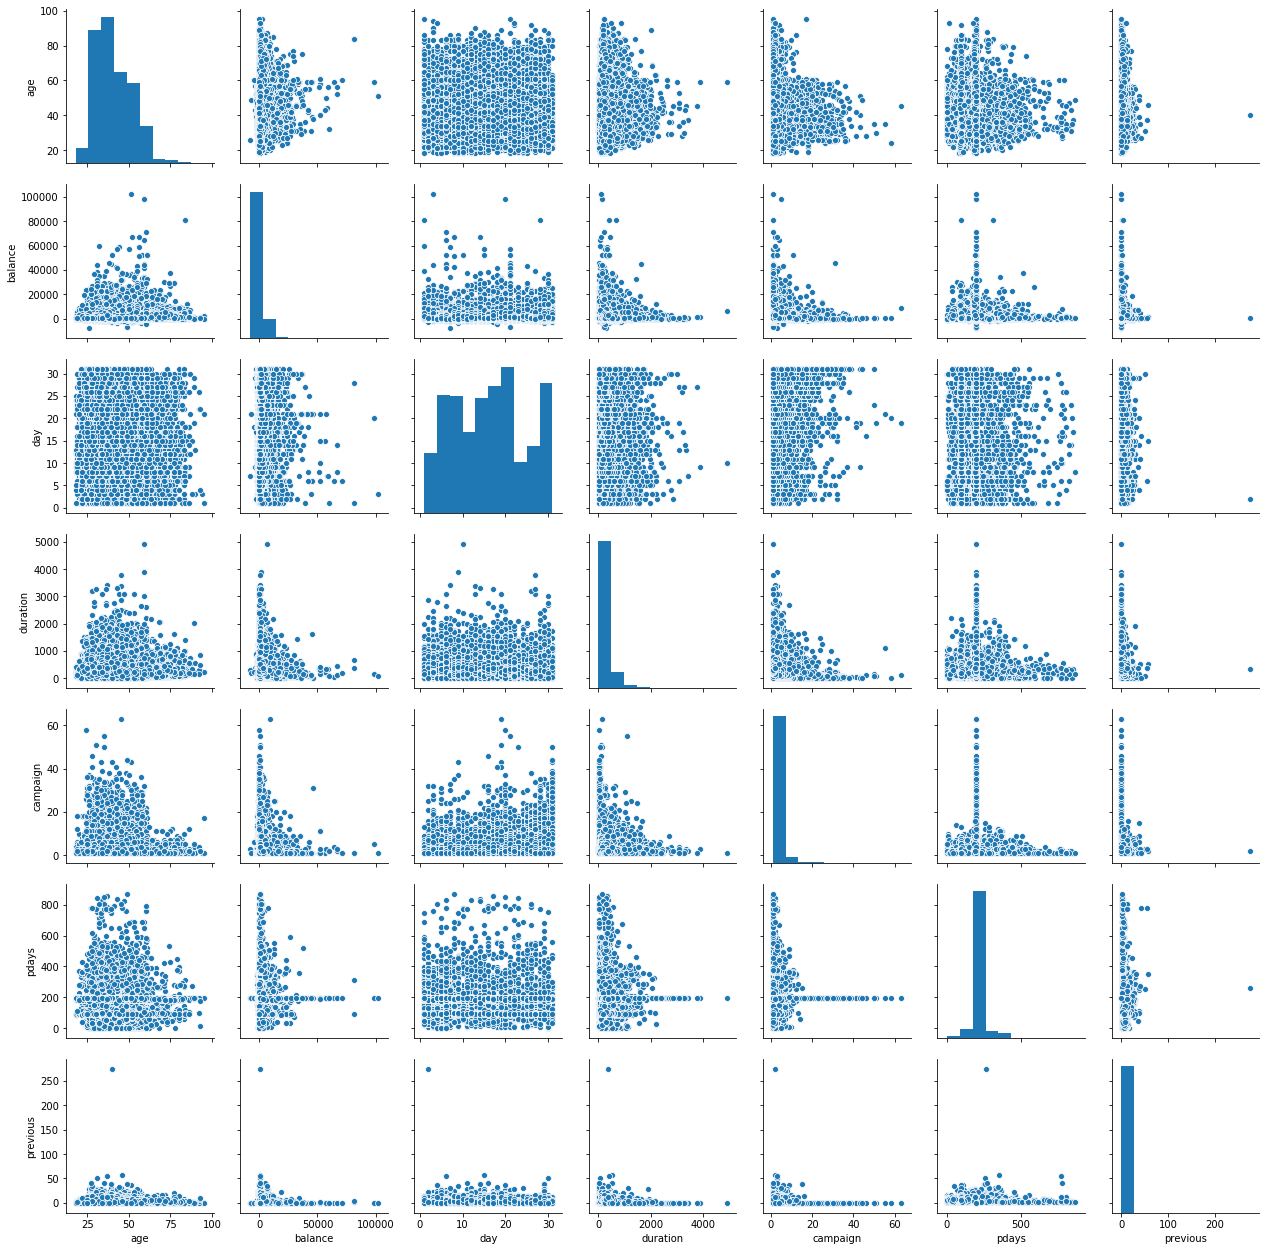

In [27]:
sns.pairplot(df)

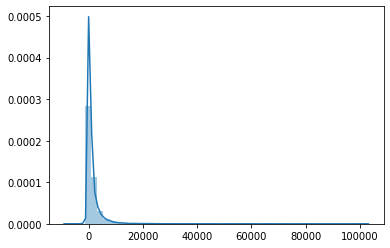

In [63]:
sns.distplot(df[['balance']],kde=True)


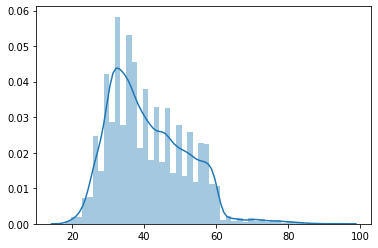

In [64]:
sns.distplot(df[['age']],kde=True)


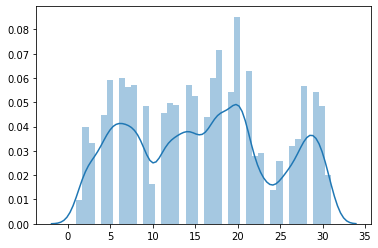

In [65]:
sns.distplot(df[['day']],kde=True)


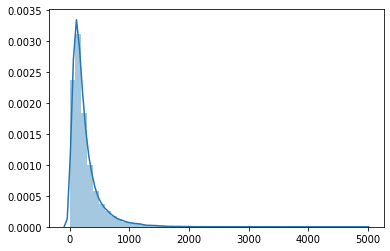

In [66]:
sns.distplot(df[['duration']],kde=True)


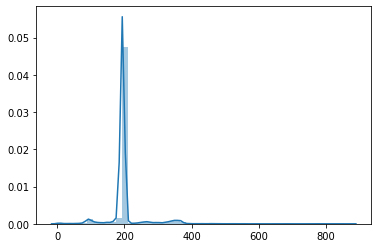

In [67]:
sns.distplot(df[['pdays']],kde=True)

# 5 Point summary

5 Point summary will tell

1. 1st quartile , 25 % of data
2. 2nd quartile , 50 % of data, called median as well
3. 3rd quartile , 75 % of data
4. Min value of data frame
5. Max value of data frame

In [68]:
#Interquntile range will suggest how disperse the data is 
print ('--------------First quartile---------------')
print (df.quantile([.25, .50, .75]).iloc[0:1])
print ('--------------Second quartile---------------')
print (df.quantile([.25, .50, .75]).iloc[1:2])
print ('--------------Third quartile---------------')
print (df.quantile([.25, .50, .75]).iloc[2:3])
print ('--------------Minimum Value---------------')
print ('min value in (age) in data frame is \n '+str(df.min()))
print ('--------------Max Value---------------')
print ('max value in (age) in data frame is \n '+str(df.max()))


--------------First quartile---------------
       age  balance  day  duration  campaign  pdays  previous
0.25  33.0     74.0  8.0     103.0       1.0  194.0       0.0
--------------Second quartile---------------
      age  balance   day  duration  campaign  pdays  previous
0.5  39.0    450.0  16.0     180.0       2.0  194.0       0.0
--------------Third quartile---------------
       age  balance   day  duration  campaign  pdays  previous
0.75  48.0   1428.0  21.0     319.0       3.0  194.0       0.0
--------------Minimum Value---------------
min value in (age) in data frame is 
 age                18
job            admin.
marital      divorced
education     primary
default            no
balance         -8019
housing            no
loan               no
contact      cellular
day                 1
month             apr
duration            0
campaign            1
pdays               1
previous            0
poutcome      failure
Target             no
dtype: object
--------------Max Value-

# Finding outliers

lets see the outliers with box plot first 

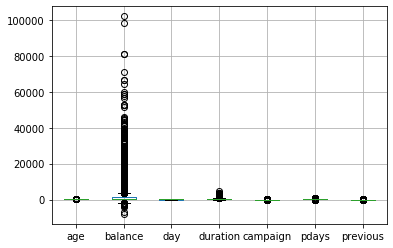

In [69]:
df.boxplot()

We can see that there are lots of outliers , especially in 'balance' columns
below is a function which will find the number of outliers in each column

In [70]:
def detect_outlier(df_in, col_name):
    df_in=df_in.sort_values(by=col_name,ascending=True)
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    print ('lowerbound-->'+str(fence_low))
    fence_high = q3+1.5*iqr
    print ('higherbound-->'+str(fence_high))
    df_outlier=[x for x in df_in[col_name] if x<fence_low or x>fence_high]
    if len(df_outlier)==0:
        print ('no outlier')
    else:
        print ('there are==>' + str(len(df_outlier))+' Outliers \n')
        #print  (df_outlier)
    #return df_outlier

In [71]:
list_numeric=df.describe().columns.tolist()
for item in list_numeric:
    print ("outliers in-->"+str(item))
    detect_outlier(df,item)


outliers in-->age
lowerbound-->10.5
higherbound-->70.5
there are==>487 Outliers 

outliers in-->balance
lowerbound-->-1957.0
higherbound-->3459.0
there are==>4736 Outliers 

outliers in-->day
lowerbound-->-11.5
higherbound-->40.5
no outlier
outliers in-->duration
lowerbound-->-221.0
higherbound-->643.0
there are==>3235 Outliers 

outliers in-->campaign
lowerbound-->-2.0
higherbound-->6.0
there are==>3064 Outliers 

outliers in-->pdays
lowerbound-->194.0
higherbound-->194.0
there are==>8242 Outliers 

outliers in-->previous
lowerbound-->0.0
higherbound-->0.0
there are==>8257 Outliers 



# Removing outlier - Comparing the original data with the data after outliers removed

There are around 18000 total outliers in data frame, if i will delete all the rows containing outliers
my data will be wiped around 50% , so i will hold the activity of removing outliers.

However, below is a method which can remove the outliers and i have created duplicate data frame to show the diffrence 

In [72]:
#copy of original data frame
df_copy=df.copy()

In [73]:
#Finding the column values which exceeds IQR range
for item in list_numeric:
    df_copy[item]=df_copy[item].mask((df_copy[item] - df_copy[item].mean()).abs() > 1.5 * df_copy[item].std())

In [74]:
#dropping the outliers
#print (df.shape)
df_copy=df_copy.dropna()

print ('Shape of data after removing outliers')
print (df_copy.shape)
print ('Shape of data before removing outliers')
print (df.shape)
#print (df.shape)

Shape of data after removing outliers
(24886, 17)
Shape of data before removing outliers
(45211, 17)


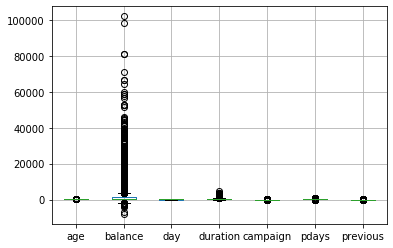

In [75]:

df.boxplot()

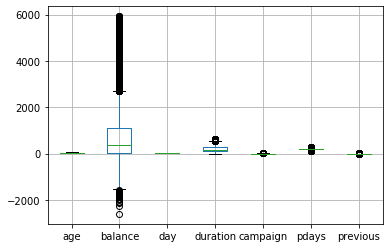

In [76]:
df_copy.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC190505F8>,
      dtype=object)

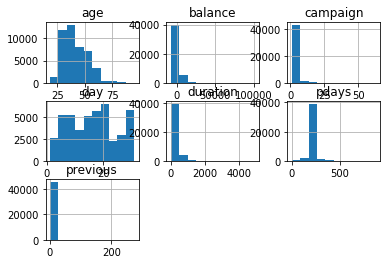

In [77]:
df.hist()

# Handling Target variable 

In [78]:
#Check for unique values in dataframe
df['Target'].unique()


array(['no', 'yes'], dtype=object)

In [79]:
#Convering the categorical data into cat code 
df['Target']=df['Target'].astype('category')
df['Target']=df['Target'].cat.codes


In [80]:
df.groupby('Target').describe()

age                                                      balance  \
          count       mean        std   min   25%   50%   75%   max    count   
Target                                                                         
0       39922.0  40.838986  10.172662  18.0  33.0  39.0  48.0  95.0  39922.0   
1        5289.0  41.670070  13.497781  18.0  31.0  38.0  50.0  95.0   5289.0   

                     ...  pdays        previous                                \
               mean  ...    75%    max    count      mean       std  min  25%   
Target               ...                                                        
0       1304.234633  ...  194.0  871.0  39922.0  0.502154  2.256771  0.0  0.0   
1       1804.609000  ...  194.0  854.0   5289.0  1.170354  2.553272  0.0  0.0   

                         
        50%  75%    max  
Target                   
0       0.0  0.0  275.0  
1       0.0  1.0   58.0  

[2 rows x 56 columns]

# Handling Categorical variable 

In [81]:
#Filtering the data with object type
object_datatype=[]
for items in df.columns:
    if df[items].dtypes=='object':
        object_datatype.append(items)
        print (items)

job
marital
education
default
housing
loan
contact
month
poutcome


# One Hot Coding

In [82]:
for items in object_datatype:
    df[items]=df[items].astype('category')
    df=pd.get_dummies(df, columns=[items])
df.shape

(45211, 48)

In [83]:
df.head(5)

,age,balance,day,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,2143.0,5,261,1,194.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,44,29.0,5,151,1,194.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,33,2.0,5,76,1,194.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,47,1506.0,5,92,1,194.0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,33,1.0,5,198,1,194.0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [84]:
df.dtypes

age                      int64
balance                float64
day                      int64
duration                 int64
campaign                 int64
pdays                  float64
previous                 int64
Target                    int8
job_admin.               uint8
job_blue-collar          uint8
job_entrepreneur         uint8
job_housemaid            uint8
job_management           uint8
job_retired              uint8
job_self-employed        uint8
job_services             uint8
job_student              uint8
job_technician           uint8
job_unemployed           uint8
marital_divorced         uint8
marital_married          uint8
marital_single           uint8
education_primary        uint8
education_secondary      uint8
education_tertiary       uint8
default_no               uint8
default_yes              uint8
housing_no               uint8
housing_yes              uint8
loan_no                  uint8
loan_yes                 uint8
contact_cellular         uint8
contact_

# Splitting the data into X and y 

In [85]:
X=df.drop(['Target'],axis=1,inplace=False)

#Creating a dependent Dataframe with Survived column

y=df['Target']


#Applying Z score on indepnedent variables 

In [86]:
#this will allow the different datatypes like float and int to be on same level
from scipy.stats import zscore
X=X.apply(zscore)

# Finding correlation of independent variable and target variable

In [87]:
#df[df.columns[1:]].corr()['LoanAmount'][:]
#df[df.columns[1:]].columns
df[df.columns[1:]].corr()['Target']

balance                0.052823
day                   -0.028348
duration               0.394521
campaign              -0.073172
pdays                 -0.043926
previous               0.093236
Target                 1.000000
job_admin.             0.005637
job_blue-collar       -0.071279
job_entrepreneur      -0.019662
job_housemaid         -0.015195
job_management         0.032919
job_retired            0.079245
job_self-employed      0.000855
job_services          -0.027864
job_student            0.076897
job_technician        -0.008970
job_unemployed         0.020390
marital_divorced       0.002772
marital_married       -0.060260
marital_single         0.063526
education_primary     -0.040393
education_secondary   -0.031779
education_tertiary     0.066448
default_no             0.022419
default_yes           -0.022419
housing_no             0.139173
housing_yes           -0.139173
loan_no                0.068185
loan_yes              -0.068185
contact_cellular      -0.014042
contact_

# Using Algorithams

# KNN

In [91]:
from sklearn.model_selection import train_test_split
#splitting the data into four variables , 70% of data will be used to train the model and rest 30% is to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [92]:
#Getting the shapes of data
print (X_test.shape)
print (X_train.shape)
print (y_test.shape)
print (y_train.shape)

(13564, 47)
(31647, 47)
(13564,)
(31647,)


In [93]:
#importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=10)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [94]:
#doing the prediction 
predicted= model.predict(X_test) # 0:Overcast, 2:Mild
print(predicted)

[0 0 0 ... 0 0 1]


In [95]:
score=round(model.score(X_test,y_test)*100,2)
#Score for predicting the survivor 
print (score)

89.66


In [96]:
#Confusion matrix
from sklearn import metrics
print (metrics.confusion_matrix(y_test,predicted))

[[11800   213]
 [ 1189   362]]


In [97]:
#recall and precision
from sklearn import metrics
def myscores(smat): 
    tp = smat[0][0] 
    fp = smat[0][1] 
    fn = smat[1][0] 
    tn = smat[1][1] 
    return tp/(tp+fp), tp/(tp+fn)

recall=round(myscores(metrics.confusion_matrix(y_test,predicted))[0]*100,2)
precision=round(myscores(metrics.confusion_matrix(y_test,predicted))[1]*100,2)
print ('recall is ==>'+str(recall))
print ('precision is ==>'+str(precision))

recall is ==>98.23
precision is ==>90.85


Saving the Model Name, Accuracy Score ,Precision,Recall in a list

In [98]:
data_knn=[['KNN',score,precision,recall]]


# 2.Logistic regression 

In [99]:
#importing libraries 

from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
#Predicting the outcome
y_predict = model.predict(X_test)

In [101]:
model_score = round(model.score(X_test, y_test)*100,2)
print(model_score)

90.06


In [102]:
print(metrics.confusion_matrix(y_test, y_predict))

[[11694   319]
 [ 1029   522]]


In [103]:
#Precision and Recall
recall=round(myscores(metrics.confusion_matrix(y_test,y_predict))[0]*100,2)
precision=round(myscores(metrics.confusion_matrix(y_test,y_predict))[1]*100,2)
print("precision and recall:", precision,recall)

precision and recall: 91.91 97.34


Saving the data

In [104]:
score=model_score
data_logistic=[['Logistic Regression',score,precision,recall]]

# Naive-Biyas Theorem

In [105]:
#Importing libraries
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [106]:
#Predicting outcome
model=GaussianNB()
model.fit(X_train,y_train)
expected=y_test
predicted=model.predict(X_test)
print (metrics.classification_report(y_test,predicted))
print (metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91     12013
           1       0.38      0.51      0.43      1551

    accuracy                           0.85     13564
   macro avg       0.66      0.70      0.67     13564
weighted avg       0.87      0.85      0.86     13564

[[10729  1284]
 [  766   785]]


In [107]:
score=round (model.score(X_test,y_test)*100,2)
score

84.89

In [108]:
recall=round(myscores(metrics.confusion_matrix(y_test,predicted))[0]*100,2)
precision=round(myscores(metrics.confusion_matrix(y_test,predicted))[1]*100,2)
print("precision and recall:", precision,recall)
data_nb=[['Naive Bayes',score,precision,recall]]

precision and recall: 93.34 89.31


# Support Vector Machine

In [109]:
#importing necessary libraries 
from sklearn import svm
clf = svm.SVC(gamma=0.025, C=3) 
clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)

In [110]:
score=round (clf.score(X_test,y_test)*100,2)
print (score)

90.1


In [111]:
#Calculating precision and recall 
recall=round(myscores(metrics.confusion_matrix(y_test,y_pred))[0]*100,2)
precision=round(myscores(metrics.confusion_matrix(y_test,y_pred))[1]*100,2)
print("precision and recall:", precision,recall)
data_svm=[['Support Vector machine',score,precision,recall]]

precision and recall: 92.22 97.0


# Decision Tree Algoritham

We will be using Decison Tree algoritham to do the classification

In [112]:
from sklearn.tree import DecisionTreeClassifier

In [113]:
df.shape

(45211, 48)

splitting the data into train set and test set 

In [114]:

dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [115]:
score=round(dt_model.score(X_test,y_test),2)*100
score

90.0

In [116]:
#printing the importance 
print (pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

                          Imp
age                  0.001696
balance              0.018877
day                  0.000000
duration             0.591824
campaign             0.001557
pdays                0.014984
previous             0.000000
job_admin.           0.000000
job_blue-collar      0.000000
job_entrepreneur     0.000000
job_housemaid        0.000000
job_management       0.000000
job_retired          0.000000
job_self-employed    0.000000
job_services         0.000000
job_student          0.000000
job_technician       0.000000
job_unemployed       0.000000
marital_divorced     0.000000
marital_married      0.001583
marital_single       0.000000
education_primary    0.000000
education_secondary  0.000000
education_tertiary   0.002768
default_no           0.000000
default_yes          0.000000
housing_no           0.084565
housing_yes          0.000000
loan_no              0.000000
loan_yes             0.000000
contact_cellular     0.000000
contact_telephone    0.000000
month_apr 

In [117]:
#Printing the decision tree

In [118]:
y_predict=dt_model.predict(X_test)

In [119]:
print (dt_model.score(X_train,y_train))
print (dt_model.score(X_test,y_test))

0.902392011881063
0.9004718372161604


In [120]:
#confusion metrics
print (metrics.confusion_matrix(y_test,y_predict))

[[11627   386]
 [  964   587]]


In [121]:
recall=round(myscores(metrics.confusion_matrix(y_test,y_predict))[0]*100,2)
precision=round(myscores(metrics.confusion_matrix(y_test,y_predict))[1]*100,2)
print ('recall is ==>'+str(recall))
print ('precision is ==>'+str(precision))

recall is ==>96.79
precision is ==>92.34


In [122]:
data_dt=[['Decison tree',score,precision,recall]]

# ENSEMBLE TECHNIQUES

# Bagging

In [123]:
#Bagging
df.dtypes
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(n_estimators=50,max_samples=.8,oob_score=True)
bgcl=bgcl.fit(X_train,y_train)
print (bgcl.oob_score_)

0.9006540904351124


In [124]:
#Creating a bagging function to be used with other models later on 

def bagging_score(model_object):
    from sklearn.ensemble import BaggingClassifier
    bgcl=BaggingClassifier(base_estimator=model_object,n_estimators=5,max_samples=.8,oob_score=True)
    bgcl=bgcl.fit(X_train,y_train)
    return (round((bgcl.oob_score_)*100,2))
    

In [125]:
#Predict,Precison,recall
bgcl_score=round(bgcl.score(X_test,y_test)*100,2)
bgcl_predict=bgcl.predict(X_test)
bgcl_recall=round(myscores(metrics.confusion_matrix(y_test,bgcl_predict))[0]*100,2)
bgcl_precision=round(myscores(metrics.confusion_matrix(y_test,bgcl_predict))[1]*100,2)
print ('recall is ==>'+str(bgcl_recall))
print ('precision is ==>'+str(bgcl_precision))
data_bgcl=[['Bagging',bgcl_score,bgcl_precision,bgcl_recall]]

recall is ==>96.35
precision is ==>93.39


# Boosting

In [126]:
#Boosting 
#Ada boosting 
from sklearn.ensemble import AdaBoostClassifier
abcl=AdaBoostClassifier(base_estimator=dt_model,n_estimators=50)
abcl.fit(X_train,y_train)



AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                          

In [127]:
#making function for ada boosting to be used by other base_estimators later on
def ada_boosting_score(model):
    from sklearn.ensemble import AdaBoostClassifier
    abcl=AdaBoostClassifier(base_estimator=model,n_estimators=50)
    abcl.fit(X_train,y_train)
    abcl_predict=abcl.predict(X_test)
    score=round(abdcl.score(X_test,y_test)*100,2)
    return score

In [128]:
abcl_pred=abcl.predict(X_test)
abcl.score(X_test,y_test)

0.8961220878796815

In [129]:
#score , precison, recall
abcl_score=round(abcl.score(X_test,y_test)*100,2)
abcl_predict=abcl.predict(X_test)
abcl_recall=round(myscores(metrics.confusion_matrix(y_test,abcl_predict))[0]*100,2)
abcl_precision=round(myscores(metrics.confusion_matrix(y_test,abcl_predict))[1]*100,2)
print ('recall is ==>'+str(abcl_recall))
print ('precision is ==>'+str(abcl_precision))
data_abcl=[['Ada boosting',abcl_score,abcl_precision,abcl_recall]]

recall is ==>95.2
precision is ==>93.22


# Gradient boost

In [130]:
#Gradient boost
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier(n_estimators=50,learning_rate=.08,max_depth=5)
gbcl.fit(X_train,y_train)



GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.08, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [131]:
test_pred=gbcl.predict(X_test)
gbcl.score(X_test,y_test)

0.9048215865526393

In [132]:
#score , precison, recall
gbcl_score=round(gbcl.score(X_test,y_test)*100,2)
gbcl_predict=gbcl.predict(X_test)
gbcl_recall=round(myscores(metrics.confusion_matrix(y_test,gbcl_predict))[0]*100,2)
gbcl_precision=round(myscores(metrics.confusion_matrix(y_test,gbcl_predict))[1]*100,2)
print ('recall is ==>'+str(gbcl_recall))
print ('precision is ==>'+str(gbcl_precision))
data_gbcl=[['Gradient boosting',gbcl_score,gbcl_precision,gbcl_recall]]

recall is ==>97.09
precision is ==>92.53


In [133]:
#for gradient boosting there is no parameter as like base_estimators

# Random Forest

In [134]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=50)
rfcl.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [135]:
#Prediction and Score
test_pred=rfcl.predict(X_test)
rfcl.score(X_test,y_test)

0.9060011795930404

In [136]:
#score , precison, recall
rfcl_score=round(rfcl.score(X_test,y_test)*100,2)
rfcl_predict=rfcl.predict(X_test)
rfcl_recall=round(myscores(metrics.confusion_matrix(y_test,rfcl_predict))[0]*100,2)
rfcl_precision=round(myscores(metrics.confusion_matrix(y_test,rfcl_predict))[1]*100,2)
print ('recall is ==>'+str(rfcl_recall))
print ('precision is ==>'+str(rfcl_precision))
data_rfcl=[['Random Forest',rfcl_score,rfcl_precision,rfcl_recall]]

recall is ==>97.19
precision is ==>92.56


# Final Summary- Model Performances

In [137]:
df_summ=pd.DataFrame(columns=['Model','Accuracy','Precison','Recall'])

df_summ=df_summ.append(pd.DataFrame(data_logistic,columns=['Model','Accuracy','Precison','Recall']),ignore_index=True)
#print (df_summ.columns)
df_summ=df_summ.append(pd.DataFrame(data_knn,columns=['Model','Accuracy','Precison','Recall']),ignore_index=True)
df_summ=df_summ.append(pd.DataFrame(data_nb,columns=['Model','Accuracy','Precison','Recall']),ignore_index=True)
df_summ=df_summ.append(pd.DataFrame(data_svm,columns=['Model','Accuracy','Precison','Recall']),ignore_index=True)
df_summ=df_summ.append(pd.DataFrame(data_dt,columns=['Model','Accuracy','Precison','Recall']),ignore_index=True)
df_summ.head(5)

,Model,Accuracy,Precison,Recall
0,Logistic Regression,90.06,91.91,97.34
1,KNN,89.66,90.85,98.23
2,Naive Bayes,84.89,93.34,89.31
3,Support Vector machine,90.10,92.22,97.00
4,Decison tree,90.00,92.34,96.79


# Final Summary-Ensemble technique Performances

In [138]:

df_ensemble=pd.DataFrame(columns=['Ensemble Technique with Decision Tree','Accuracy','Precison','Recall'])

df_ensemble=df_ensemble.append(pd.DataFrame(data_bgcl,columns=['Ensemble Technique with Decision Tree','Accuracy','Precison','Recall']),ignore_index=True)
df_ensemble=df_ensemble.append(pd.DataFrame(data_abcl,columns=['Ensemble Technique with Decision Tree','Accuracy','Precison','Recall']),ignore_index=True)
df_ensemble=df_ensemble.append(pd.DataFrame(data_gbcl,columns=['Ensemble Technique with Decision Tree','Accuracy','Precison','Recall']),ignore_index=True)
df_ensemble=df_ensemble.append(pd.DataFrame(data_rfcl,columns=['Ensemble Technique with Decision Tree','Accuracy','Precison','Recall']),ignore_index=True)
#print (df_summ.columns)
df_ensemble.head(5)

,Ensemble Technique with Decision Tree,Accuracy,Precison,Recall
0,Bagging,90.73,93.39,96.35
1,Ada boosting,89.61,93.22,95.20
2,Gradient boosting,90.48,92.53,97.09
3,Random Forest,90.60,92.56,97.19


# Combine result of individual models and Ensemble techniques

In [139]:
pd.concat([df_summ,df_ensemble],axis=1)

,Model,Accuracy,Precison,Recall,Ensemble Technique with Decision Tree,Accuracy,Precison,Recall
0,Logistic Regression,90.06,91.91,97.34,Bagging,90.73,93.39,96.35
1,KNN,89.66,90.85,98.23,Ada boosting,89.61,93.22,95.20
2,Naive Bayes,84.89,93.34,89.31,Gradient boosting,90.48,92.53,97.09
3,Support Vector machine,90.10,92.22,97.00,Random Forest,90.60,92.56,97.19
4,Decison tree,90.00,92.34,96.79,NaN,NaN,NaN,NaN


# Bagging with other base estimators - This is resource intensive

In [154]:
knn_model = KNeighborsClassifier(n_neighbors=3)

In [155]:
#KNN Model with Bagging 
model_score=bagging_score(knn_model)
print (model_score)


88.43


c:\python37\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\python37\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [142]:
data_bgcl_knn=[['bagging with KNN',model_score]]

In [143]:
#ada_score=ada_boosting_score(knn_model)
#ada_score

In [144]:
log_model=LogisticRegression()

In [145]:
log_score=bagging_score(log_model)
print (log_score)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


89.92


c:\python37\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\python37\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [146]:
data_bgcl_logistic=[['bagging with logistic',log_score]]

In [147]:
NB_model=GaussianNB()
NB_score=bagging_score(NB_model)
print (NB_score)

85.03


c:\python37\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\python37\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [148]:
data_bgcl_NB=[['bagging with Naive Bias',NB_score]]

In [149]:
svm_model = svm.SVC(gamma=0.025, C=3)
svm_score=bagging_score(svm_model)
print (svm_score)

89.64


c:\python37\lib\site-packages\sklearn\ensemble\bagging.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\python37\lib\site-packages\sklearn\ensemble\bagging.py:616: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


In [150]:
data_bgcl_svm=[['bagging with SVM',svm_score]]

In [151]:
df_base_estimator=pd.DataFrame(columns=['Ensemble with Base_estimator','Accuracy'])

In [152]:
df_base_estimator=df_base_estimator.append(pd.DataFrame(data_bgcl_knn,columns=['Ensemble with Base_estimator','Accuracy']),ignore_index=True)
df_base_estimator=df_base_estimator.append(pd.DataFrame(data_bgcl_logistic,columns=['Ensemble with Base_estimator','Accuracy']),ignore_index=True)
df_base_estimator=df_base_estimator.append(pd.DataFrame(data_bgcl_NB,columns=['Ensemble with Base_estimator','Accuracy']),ignore_index=True)
df_base_estimator=df_base_estimator.append(pd.DataFrame(data_bgcl_svm,columns=['Ensemble with Base_estimator','Accuracy']),ignore_index=True)
df_base_estimator.head(5)

,Ensemble with Base_estimator,Accuracy
0,bagging with KNN,88.38
1,bagging with logistic,89.92
2,bagging with Naive Bias,85.03
3,bagging with SVM,89.64


# Combined summary of Bagging with other base estimator +Individual Model performaces+Bagging with decision Tree 

In [153]:
pd.concat([df_base_estimator,df_summ,df_ensemble],axis=1)

,Ensemble with Base_estimator,Accuracy,Model,Accuracy,Precison,Recall,Ensemble Technique with Decision Tree,Accuracy,Precison,Recall
0,bagging with KNN,88.38,Logistic Regression,90.06,91.91,97.34,Bagging,90.73,93.39,96.35
1,bagging with logistic,89.92,KNN,89.66,90.85,98.23,Ada boosting,89.61,93.22,95.20
2,bagging with Naive Bias,85.03,Naive Bayes,84.89,93.34,89.31,Gradient boosting,90.48,92.53,97.09
3,bagging with SVM,89.64,Support Vector machine,90.10,92.22,97.00,Random Forest,90.60,92.56,97.19
4,NaN,NaN,Decison tree,90.00,92.34,96.79,NaN,NaN,NaN,NaN


# Final Verdict

Bagging with Decision tree as base estimator has the highest accuracy of 90.59